In [1]:
import re
import numpy as np
from snorkel.labeling import labeling_function
import json
def check_usage(text, word, param='VERB'):
    # Split the text into words
    words = text.lower().split()

    # Search for the word and check its part of speech
    for w in words:
        if w == word.lower():
            # Assume the word is a verb if not specified
            pos = 'VERB' if param is None else param

            # Check if the word is of the specified part of speech
            if pos == 'VERB':
                return True
    return False


def lf_pattern1(x):
    pattern = 'slow.*fast'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) and 'performance' in commit_message else -1


def lf_pattern2(x):
    pattern = 'speed.*up'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) and 'perf' in commit_message  else -1


def lf_pattern3(x):
    pattern = r'vector.*improve|vector.*improves|vector.*improving|vector.*improved|vectorize.*improve|vectorize.*improves|vectorize.*improving|vectorize.*improved|vectorzing.*improve|vectorzing.*improves|vectorzing.*improving|vectorzing.*improved|vectorized.*improve|vectorized.*improves|vectorized.*improving|vectorized.*improved'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) and 'performance' in commit_message else -1


def lf_pattern4(x):
    pattern = r'fast.*memory|faster.*memory'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) and 'perf' in commit_message else -1


def lf_pattern5(x): # removed for now
    pattern = r'universal.*intrinsics|universal.*intrinsics'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) else -1
def lf_pattern6(x):
    pattern = r'(?<=[ ,.])(backend .*performance)(?=[ ,.])|(backend .*performances)(?=[ ,.])'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern8(x):
    pattern = r'(?<=[ ,.])performance .*(benefit|gain|increas|hit)'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern9(x):
    pattern1 = r'(?<=[ ,.])more .*efficien'
    pattern2 = r'(?<=[ ,.])(performance|optimize|optimizes|optimized|optimization|optimizations|speed.*up|efficien|faster|benefit|gain|increas|hit|solution|patch|code)'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern1, commit_message) and re.search(pattern2, commit_message) else -1
    return -1

def lf_pattern10(x):
    pattern = r'(?<=[ ,.])performance .*bug'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) and 'increas' in commit_message else -1
    return -1

def lf_pattern7(x):
    pattern = 'speedup.*added|speedups.*added|speed-up.*added'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) else -1

def lf_pattern13(x):
    pattern = r'patch.*improve|patch.*improves|patch.*improving|patch.*improved'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) else -1
def lf_pattern14(x):
    pattern = r'accelerat'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) else -1

def lf_pattern19(x):
    pattern = r'(\d+)% fast'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) else -1

def lf_pattern20(x):
    pattern = r'(\d+)x faster'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) else -1
def lf_pattern31(x):
    pattern = r'(?<=[ ,.])increas.*performance(?=[ ,.])'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) else -1
def lf_pattern32(x):
    pattern = r'reduc.*overhead'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) else -1

def lf_pattern33(x):
    pattern = r' optimiz'
    commit_message = x.replace('\n', ' ').lower()
    if 'optimized' in commit_message and not check_usage(commit_message, 'optimized'):
        return -1
    else:
        return 1 if re.search(pattern, commit_message) and 'performance' in commit_message and 'optimizer' not in commit_message else -1

def lf_pattern36(x):
    pattern = r'memory.*optimiz'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) else -1

def lf_pattern37(x):
    pattern = r'avoid.*overhead|reduce.*overhead'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) else -1

def lf_pattern41(x):
    pattern = r'faster'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) and 'performance' in commit_message else -1

def lf_pattern44(x):
    text = x.replace('\n', ' ').lower()
    if "memory" in text and "leak" in text and "performance" in text:
        return 1
    return -1


def lf_pattern11(x):
    pattern = r'(?<=[ ,.])(large .*performance)(?=[ ,.])|(large .*performances)(?=[ ,.])'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern12(x):
    pattern = r'(?<=[ ,.])better .*performance(?=[ ,.])|better .*performances(?=[ ,.])'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern15(x):
    pattern = r'(?<=[ ,.])(fixed .*performance)|(fixed .*performances)(?=[ ,.])'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) and 'improv' in commit_message else -1
    return -1

def lf_pattern16(x):
    pattern = r'(?<=[ ,.])improv.*performance(?=[ ,.])'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern17(x):
    pattern = r'(?<=[ ,.])(optimize .*performance)(?=[ ,.])|(optimize .*performances)(?=[ ,.])|(optimizes .*performance)(?=[ ,.])|(optimizes .*performances)(?=[ ,.])|(optimized .*performance)(?=[ ,.])|(optimized .*performances)(?=[ ,.])|(optimizing .*performance)(?=[ ,.])|(optimizing .*performances)(?=[ ,.])'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern35(x):
    pattern = r'(?<=[ ,.])inefficien'
    pattern2 = r'(?<=[ ,.])(performance|(optimize(?=[ ,.])|optimizes(?=[ ,.])|optimized(?=[ ,.])|optimization(?=[ ,.])|optimizations(?=[ ,.]))|speed .* up|efficien|faster)'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) and re.search(pattern2, commit_message) else -1
    return -1

def lf_pattern38(x):
    pattern = r'(?<=[ ,.])performance .*enhanc'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern39(x):
    pattern = r'(?<=[ ,.])performance .*gain'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern40(x):
    pattern = r'(?<=[ ,.])performance .*benefit'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern52(x):
    pattern = r'(?<=[ ,.])performance fix'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern53(x):
    pattern = r'(?<=[ ,.])performance .*(optimize(?=[ ,.])|optimizes(?=[ ,.])|optimized(?=[ ,.])|optimization(?=[ ,.])|optimizations(?=[ ,.]))'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern54(x):
    pattern = r'(?<=[ ,.])performance .*inefficien'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern55(x):
    pattern = r'(?<=[ ,.])performance .*bottleneck'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern56(x):
    pattern = r'(?<=[ ,.])performance .*hit'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern57(x):
    pattern = r'(?<=[ ,.])performance .*(increas|throughput)'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern58(x):
    pattern = r'(?<=[ ,.])performance .*regression(?=[ ,.])'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) and 'fix' in commit_message else -1
    return -1

def lf_pattern60(x):
    pattern = r'(?<=[ ,.])performance .*gain'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern64(x):
    pattern_nperf = r'(?<=[ ,.])patch'
    pattern_perf = r'(?<=[ ,.])(performance|optimiz|speed .* up|efficien|faster)'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern_nperf, commit_message) and re.search(pattern_perf, commit_message) else -1
    return -1

def lf_pattern65(x):
    pattern = r'(?<=[ ,.])performance .*((issue)|(problem)|(regression))'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern42(x):
    pattern = r'performance.*improve|performance.*improves|performance.*improving|performance.*improved|performance.*improvement'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) else -1

In [2]:
import pandas as pd
final_gold_label = pd.read_json('/home/akazad/gt_final.jsonl',lines=True)

In [3]:
final_gold_label

,commit_url,commit_message,code_diff,commit_message_token_length,code_token_length,combined_token_length,target
0,https://github.com/qbittorrent/qBittorrent/com...,Change MixedModeAlgorithm default to TCP. Clos...,"@@ -304,7 +304,7 @@ Session::Session(QObject *...",55,287,342,1
1,https://github.com/fzi-forschungszentrum-infor...,Further increase wait times for shove tree tes...,"@@ -192,13 +192,13 @@ class TestShoveTree(unit...",9,318,327,0
2,https://github.com/tonlabs/TVM-Compiler/commit...,ValueTracking: Small cleanup in ComputeNumSign...,"@@ -1768,7 +1768,7 @@ unsigned ComputeNumSignB...",43,414,457,0
3,https://github.com/git/git/commit/a6eec1263883...,upload-pack: drop lookup-before-parse optimiza...,"@@ -327,9 +327,7 @@ static int got_sha1(char *...",189,148,337,1
4,https://github.com/systemd/systemd/commit/66a6...,sd-dhcp-client: --omg-optimized\n\nPassing the...,"@@ -37,8 +37,7 @@ int dhcp_network_bind_raw_so...",183,218,401,1
...,...,...,...,...,...,...,...
271,https://github.com/hfinkel/llvm-project-cxxjit...,Output a very high-precision number llvm-svn:...,"@@ -80,7 +80,7 @@ static inline std::string it...",17,91,108,0
272,https://github.com/intel/cm-compiler/commit/d1...,Handle functions with multiple exit blocks pro...,"@@ -526,6 +526,9 @@ bool GVNPRE::runOnFunction...",17,383,400,0
273,https://github.com/ilstam/FF-Multi-Converter/c...,use textwrap.fill() from stdlib to wrap long l...,"@@ -30,7 +30,7 @@ import sys\n import re\n imp...",13,452,465,0
274,https://github.com/NYRDS/remixed-dungeon/commi...,33% chance for lich to jump on hit,"@@ -199,7 +199,11 @@ public class Lich extends...",9,141,150,0


In [4]:
import time
lf_functions = {
    'lf_pattern1': lf_pattern1,
    'lf_pattern2': lf_pattern2,
    'lf_pattern3': lf_pattern3,
    'lf_pattern4': lf_pattern4,
    'lf_pattern5':lf_pattern5,
    'lf_pattern6': lf_pattern6,
    'lf_pattern7': lf_pattern7,
    'lf_pattern8': lf_pattern8,
    'lf_pattern9': lf_pattern9,
    'lf_pattern10': lf_pattern10,
    'lf_pattern11': lf_pattern11,
    'lf_pattern12': lf_pattern12,
    'lf_pattern13': lf_pattern13,
    'lf_pattern14': lf_pattern14,
    'lf_pattern15': lf_pattern15,
    'lf_pattern16': lf_pattern16,
    'lf_pattern17': lf_pattern17,
    'lf_pattern19': lf_pattern19,
    'lf_pattern20': lf_pattern20,
    'lf_pattern31': lf_pattern31,
    'lf_pattern32': lf_pattern32,
    'lf_pattern33': lf_pattern33,
    'lf_pattern35': lf_pattern35,
    'lf_pattern36': lf_pattern36,
    'lf_pattern37': lf_pattern37,
    'lf_pattern38': lf_pattern38,
    'lf_pattern39': lf_pattern39,
    'lf_pattern40': lf_pattern40,
    'lf_pattern41': lf_pattern41,
    'lf_pattern42': lf_pattern42,
    'lf_pattern44': lf_pattern44,
    'lf_pattern52': lf_pattern52,
    'lf_pattern53': lf_pattern53,
    'lf_pattern54': lf_pattern54,
    'lf_pattern55': lf_pattern55,
    'lf_pattern56': lf_pattern56,
    'lf_pattern57': lf_pattern57,
    'lf_pattern58': lf_pattern58,
    'lf_pattern60': lf_pattern60,
    'lf_pattern64': lf_pattern64,
    'lf_pattern65': lf_pattern65,
}
start_time=time.time()
# Apply labeling functions and create a filter column
for name, lf in lf_functions.items():
    final_gold_label[name] = final_gold_label['commit_message'].apply(lf)

# Create a single column to summarize results
final_gold_label['label'] = final_gold_label[list(lf_functions.keys())].apply(lambda row: 1 if (row == 1).any() else -1, axis=1)

# Drop individual labeling function columns
final_gold_label = final_gold_label[['commit_message', 'label','target']]
end_time= time.time()
# Show the DataFrame with the summarized column
print(final_gold_label)

                                        commit_message  label  target
0    Change MixedModeAlgorithm default to TCP. Clos...     -1       1
1    Further increase wait times for shove tree tes...     -1       0
2    ValueTracking: Small cleanup in ComputeNumSign...     -1       0
3    upload-pack: drop lookup-before-parse optimiza...     -1       1
4    sd-dhcp-client: --omg-optimized\n\nPassing the...     -1       1
..                                                 ...    ...     ...
271  Output a very high-precision number  llvm-svn:...     -1       0
272  Handle functions with multiple exit blocks pro...     -1       0
273  use textwrap.fill() from stdlib to wrap long l...     -1       0
274                 33% chance for lich to jump on hit     -1       0
275  Note why logging a large variant takes long co...     -1       0

[276 rows x 3 columns]


In [5]:
final_gold_label['label'].value_counts()

label
-1    252
 1     24
Name: count, dtype: int64

In [6]:
final_gold_label.loc[final_gold_label['label']==-1, 'label']=0

{'0': {'precision': 0.5476190476190477, 'recall': 1.0, 'f1-score': 0.7076923076923077, 'support': 138.0}, '1': {'precision': 1.0, 'recall': 0.17391304347826086, 'f1-score': 0.29629629629629634, 'support': 138.0}, 'accuracy': 0.5869565217391305, 'macro avg': {'precision': 0.7738095238095238, 'recall': 0.5869565217391304, 'f1-score': 0.5019943019943021, 'support': 276.0}, 'weighted avg': {'precision': 0.7738095238095238, 'recall': 0.5869565217391305, 'f1-score': 0.5019943019943021, 'support': 276.0}}


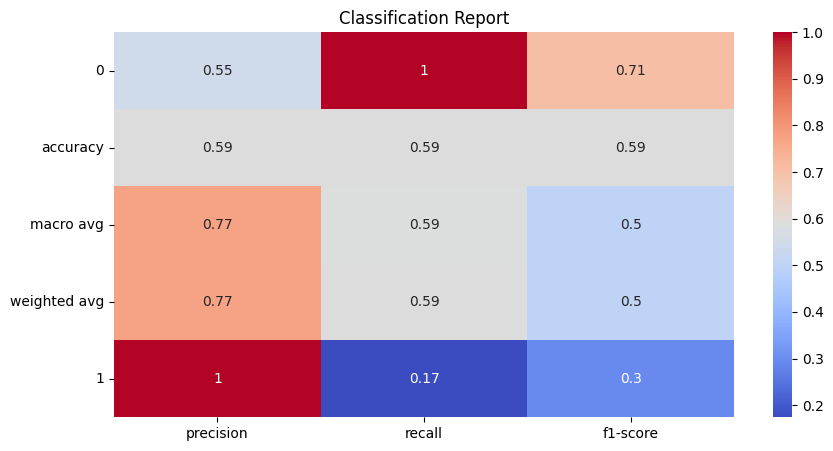

False Positives: 0
False Negatives: 114


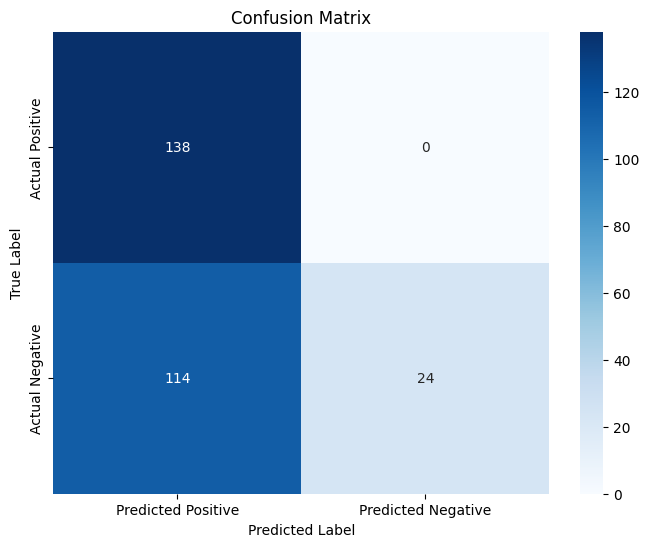

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

y_true= final_gold_label['target']
y_pred=final_gold_label['label']

# Generate the classification report
report = classification_report(y_true, y_pred,output_dict=True)

# Print the classification report
print(report)

df1 = pd.DataFrame(report).transpose()
df1 = df1.sort_values(by=['f1-score'], ascending=False)

# Plot the classification report
plt.figure(figsize=(10, 5))
sns.heatmap(df1[['precision', 'recall', 'f1-score']], annot=True, cmap='coolwarm')
plt.title('Classification Report')
plt.show()
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

# Extract true positives (TP), false positives (FP), false negatives (FN), and true negatives (TN)
tn, fp, fn, tp = cm.ravel()

# Calculate false positives and false negatives
false_positive = fp
false_negative = fn

print("False Positives:", false_positive)
print("False Negatives:", false_negative)
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Positive', 'Predicted Negative'], yticklabels=['Actual Positive', 'Actual Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()